<h1>Homework 2</h1>

In [1]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt


<h2> Research Questions </h2>

<h3> Question 1 </h3>
<p>
Exploratory Data Analysis (EDA):<br> 

- Before working on your research questions, you should provide meaningful statistical summaries through visualizations and tabular tools to understand your data.<br>
 </p>

In [2]:
""" 
    What are the fields of lighter_authors.json ?
"""

with open('data/lighter_authors.json') as lighter_authors:
    line = lighter_authors.readline()
    json_data:dict = json.loads(line)
    for key, value in json_data.items():
        print(key, type(value))


ratings_count <class 'int'>
average_rating <class 'float'>
text_reviews_count <class 'int'>
work_ids <class 'list'>
book_ids <class 'list'>
works_count <class 'int'>
id <class 'int'>
name <class 'str'>
gender <class 'str'>
image_url <class 'str'>
about <class 'str'>
fans_count <class 'int'>


In [3]:
""" 
    What are the fields of lighter_books.json ? 
"""

with open('data/lighter_books.json') as lighter_authors:
    json_data = json.loads(lighter_authors.readline())
    for key, value in json_data.items():
        print(key, type(value))

id <class 'int'>
title <class 'str'>
authors <class 'list'>
author_name <class 'str'>
author_id <class 'int'>
work_id <class 'int'>
isbn <class 'str'>
isbn13 <class 'str'>
asin <class 'str'>
language <class 'str'>
average_rating <class 'float'>
rating_dist <class 'str'>
ratings_count <class 'int'>
text_reviews_count <class 'int'>
publication_date <class 'str'>
original_publication_date <class 'str'>
format <class 'str'>
edition_information <class 'str'>
image_url <class 'str'>
publisher <class 'str'>
num_pages <class 'int'>
series_id <class 'str'>
series_name <class 'str'>
series_position <class 'str'>
shelves <class 'list'>
description <class 'str'>


In [4]:
""" 
    LOAD AND PRINT AUTHORS DATAFRAME 
"""

# This code loads only the fields needed for the exercises.
# It takes more time to load the data but less RAM memory

authors = pd.read_json('data/lighter_authors.json', lines=True)

authors




,ratings_count,average_rating,text_reviews_count,work_ids,book_ids,works_count,id,name,gender,image_url,about,fans_count
0,2862064,4.19,62681,"[3078186, 135328, 1877624, 74123, 3078120, 104...","[386162, 13, 8695, 8694, 6091075, 365, 569429,...",106,4,Douglas Adams,male,https://images.gr-assets.com/authors/159137433...,"Douglas Noël Adams was an English author, comi...",19826
1,1417316,4.02,84176,"[613469, 2305997, 940892, 2611786, 7800569, 31...","[9791, 21, 28, 24, 7507825, 27, 10538, 25, 26,...",75,7,Bill Bryson,male,https://images.gr-assets.com/authors/157859752...,"William McGuire ""Bill"" Bryson, OBE, FRS was bo...",16144
2,56159,4.53,352,"[17150, 808427, 20487307, 90550, 25460625, 171...","[349254, 15222, 14833682, 15221, 18126815, 152...",14,10,Jude Fisher,female,https://images.gr-assets.com/authors/141145711...,"Jude Fisher is the pseudonym for <a href=""http...",60
3,3302,3.79,480,"[4417, 14300808, 14780, 3796968, 44703121, 103...","[40, 9416484, 12482, 3753106, 26889789, 104764...",45,12,James Hamilton-Paterson,male,https://images.gr-assets.com/authors/127051738...,James Hamilton-Paterson's work has been transl...,72
4,7979,3.60,772,"[13330815, 19109351, 42306244, 72694240, 26291...","[8466327, 15739968, 22756778, 51026133, 260451...",61,14,Mark Watson,male,https://images.gr-assets.com/authors/133175379...,Mark Andrew Watson (born 13 February 1980) is ...,179
...,...,...,...,...,...,...,...,...,...,...,...,...
351762,19,4.26,3,"[79663810, 56338563, 65881656]","[53075671, 35051340, 42264980]",3,16777034,Lyon Gamer,male,https://images.gr-assets.com/authors/149373532...,Lyon Gamer<br />nickname sotto cui si nasconde...,0
351763,11,3.36,2,[42091916],[22604300],1,16777055,Brian Hatch,male,https://s.gr-assets.com/assets/nophoto/user/m_...,"Brian was born, he lived a little, and he has ...",0
351764,23,3.78,5,"[61906297, 61366902, 45107362]","[40246014, 39710679, 25363358]",3,16777067,Nicholas Baer,male,https://s.gr-assets.com/assets/nophoto/user/m_...,Nicholas Baer is Visiting Assistant Professor ...,1
351765,0,0.00,0,[50301486],[29919838],1,16777091,James Ketron Ross,male,https://s.gr-assets.com/assets/nophoto/user/m_...,"James Ross was a physician, winemaker, artist,...",0


In [5]:
""" 
    LOAD AND PRINT BOOKS DATAFRAME 
"""
# Given the size of the dataframe only a subset of the total dataframes will be loaded

# how many records to load
no_records = 100000

# which fields
fields = [
    'id', 
    'title', 
    'language', 
    'author_name', 
    'average_rating', 
    'ratings_count', 
    'rating_dist',
    'original_publication_date', 
    'format', 
    'num_pages', 
    'series_id', 
    'series_name', 
    'text_reviews_count'
]  

records = []
with open('data/lighter_books.json') as lighter_books:
    for i in range(no_records):
        try:
            line = lighter_books.readline()
            if not line: break
            json_data = json.loads(line)
            records.append([json_data[k] for k in fields])
        except:
            continue
    
books = pd.DataFrame(records, columns=fields)
records.clear()
books


,id,title,language,author_name,average_rating,ratings_count,rating_dist,original_publication_date,format,num_pages,series_id,series_name,text_reviews_count
0,2,Harry Potter and the Order of the Phoenix (Har...,eng,J.K. Rowling,4.50,2628006,5:1674064|4:664833|3:231195|2:41699|1:16215|to...,2003-06-21,Paperback,870,45175,Harry Potter,44716
1,3,Harry Potter and the Sorcerer's Stone (Harry P...,eng,J.K. Rowling,4.48,7377351,5:4801606|4:1681521|3:623286|2:145898|1:125040...,1997-06-26,Hardcover,309,45175,Harry Potter,116930
2,4,Harry Potter and the Chamber of Secrets (Harry...,eng,J.K. Rowling,4.43,2855044,5:1690166|4:781011|3:313727|2:54687|1:15453|to...,1998-07-02,Hardcover,352,45175,Harry Potter,55286
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,eng,J.K. Rowling,4.57,2946694,5:1994597|4:696545|3:212678|2:28915|1:13959|to...,1999-07-08,Mass Market Paperback,435,45175,Harry Potter,58023
4,6,Harry Potter and the Goblet of Fire (Harry Pot...,eng,J.K. Rowling,4.56,2705676,5:1808039|4:663849|3:193604|2:27759|1:12425|to...,2000-07-08,Paperback,734,45175,Harry Potter,48637
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99979,180123,Total Workday Control Using Microsoft Outlook,,Michael Linenberger,4.04,618,5:235|4:231|3:103|2:38|1:11|total:618,2005-10-20,Paperback,289,,,43
99980,180136,Desata Tu Poder Ilimitado!,,Anthony Robbins,4.25,65,5:37|4:12|3:12|2:3|1:1|total:65,1997-01-01,Paperback,450,,,6
99981,180137,Poder Sin Limites: La Nueva Ciencia del Desarr...,spa,Anthony Robbins,4.23,29891,5:15180|4:8706|3:4314|2:1116|1:575|total:29891,1986,,393,,,679
99982,180139,Introduction To Anthony Robbins Personal Power II,,Anthony Robbins,4.40,622,5:382|4:147|3:66|2:14|1:13|total:622,1996,Audio Cassette,4,,,25


<h3> Question 2</h3>
<p> 
Let’s finally dig into this vast dataset, retrieving some vital information: <br>

- Plot the number of books for each author in descending order. <br>
- Which book has the highest number of reviews? <br>
- Which are the top ten and ten worst books concerning the average score? <br>
- Explore the different languages in the book’s dataset, providing a proper chart summarizing how these languages are distributed throughout our virtual library. <br>
- How many books have more than 250 pages? <br>
- Plot the distribution of the fans count for the 50 most prolific authors (the ones who have written more books). <br>
</p>

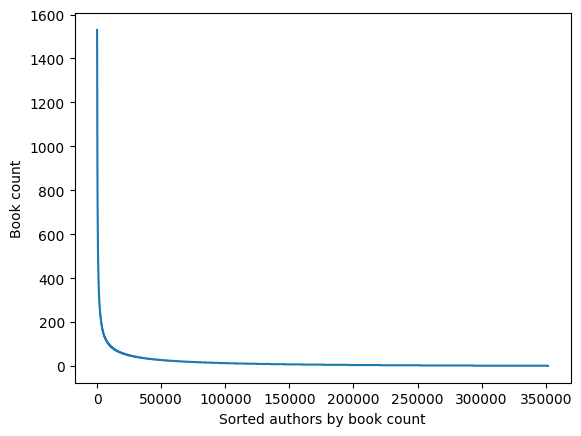

In [6]:

"""
  1.  Plot the number of books for each author in descending order
"""

# get len(book_ids) of every record
# sort the values (descending)
# plot the values
authors.book_ids.map(len).sort_values(ascending=False, ignore_index=True).plot(kind='line', x='key', y='value', xlabel='Sorted authors by book count', ylabel='Book count')
plt.show()

# conclusion: There are 2 types of writers the ones that write lots of books (minority) and the ones that write only a few (majority)

In [7]:
"""
    2. Which book has the highest number of reviews ?
"""

# Idxmax return the index of the max value in a Series
books.loc[books.text_reviews_count.idxmax()].title

"Harry Potter and the Sorcerer's Stone (Harry Potter, #1)"

In [8]:
""" 
    3a. What are the top 10 books regarding the average_rating ?
"""

books_sorted_by_score = books.sort_values(['average_rating'], ascending=False)

books_sorted_by_score.head(10).loc[:, ['id', 'title', 'average_rating']]

,id,title,average_rating
82783,143967,Guru Har Gobind,5.0
99884,179813,Kenzo Tange,5.0
53263,88378,The Sovereignty Revolution,5.0
53222,88304,Lirt Library Instruction Handbook,5.0
16913,25799,The Lazy Lama Looks At Refuge: Finding A Purpo...,5.0
38037,61705,Cotufas En El Golfo,5.0
20506,31769,"Resentment and the ""feminine"" in Nietzsche's P...",5.0
38065,61734,Obra Completa,5.0
16841,25684,Unusual Aesops Fables,5.0
88742,155942,Outpost (Notable American Author Series - Part I),5.0


In [9]:
""" 
    3b. What are the worst 10 books regarding average_rating
"""

books_sorted_by_score = books.sort_values(['average_rating'], ascending=False)

books_sorted_by_score.tail(10).loc[:, ['id', 'title', 'average_rating']]


,id,title,average_rating
39425,64099,Potassium,0.0
29243,46875,The Tram Book,0.0
15982,24372,Introducing the New SAT: The College Board's O...,0.0
15951,24323,Gordy: The Talking Pig That Made it Big,0.0
62453,105239,A Democracy Built to Last: Green/Populist Step...,0.0
62493,105316,Ruby Wax Live,0.0
87010,152512,The Dreamkeepers: Saving the Senoi,0.0
87038,152565,Une vision de Kaydara d'Hamadou-Hampaté-Bâ (Li...,0.0
87044,152574,"Elisabeth Mann Borgese, Die Meer Frau: Gespräc...",0.0
30117,48285,"Bow Wow!: South Dakota Dogs In History, Myster...",0.0


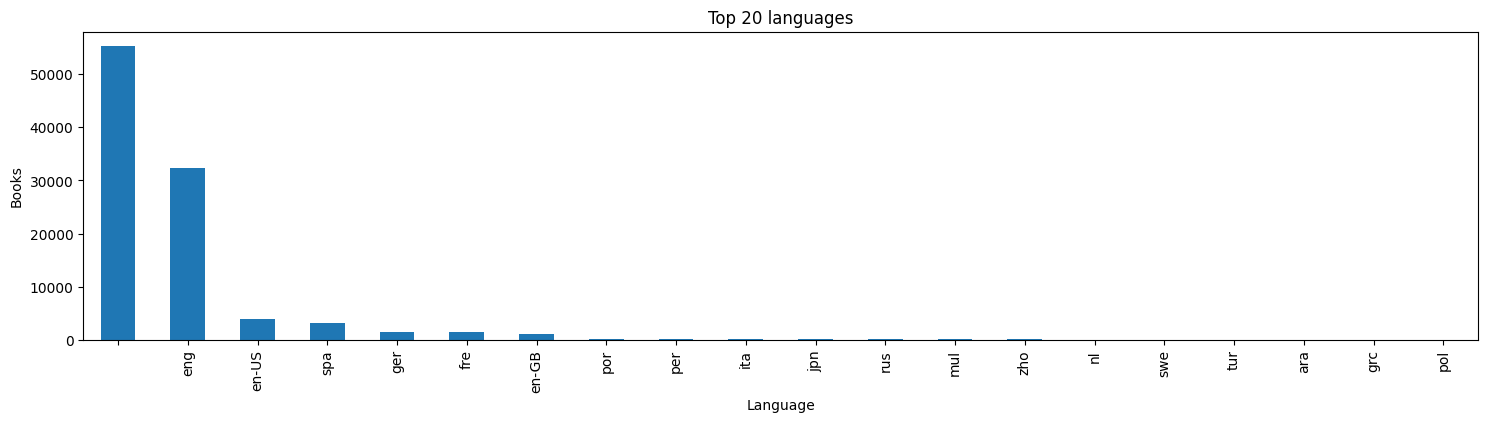

In [10]:
"""
    4. Explore the different languages in the book's dataset, providing a proper chart summarizing how these languages are distributed throughout our virtual library. 
"""

# I prefer keeping the not specified language, it gives more information about the dataset

books.language.value_counts().sort_values(ascending=False).head(20).plot(
    title="Top 20 languages",
    kind='bar', 
    figsize=(18,4),
    x='key', xlabel='Language',
    y='value', ylabel='Books'
)

plt.show()


In [11]:
""" 
    5. How many books have more than 250 pages 
"""

len(books.loc[books.num_pages.map(lambda x: int(x)>250 if x else False)].index)


41504

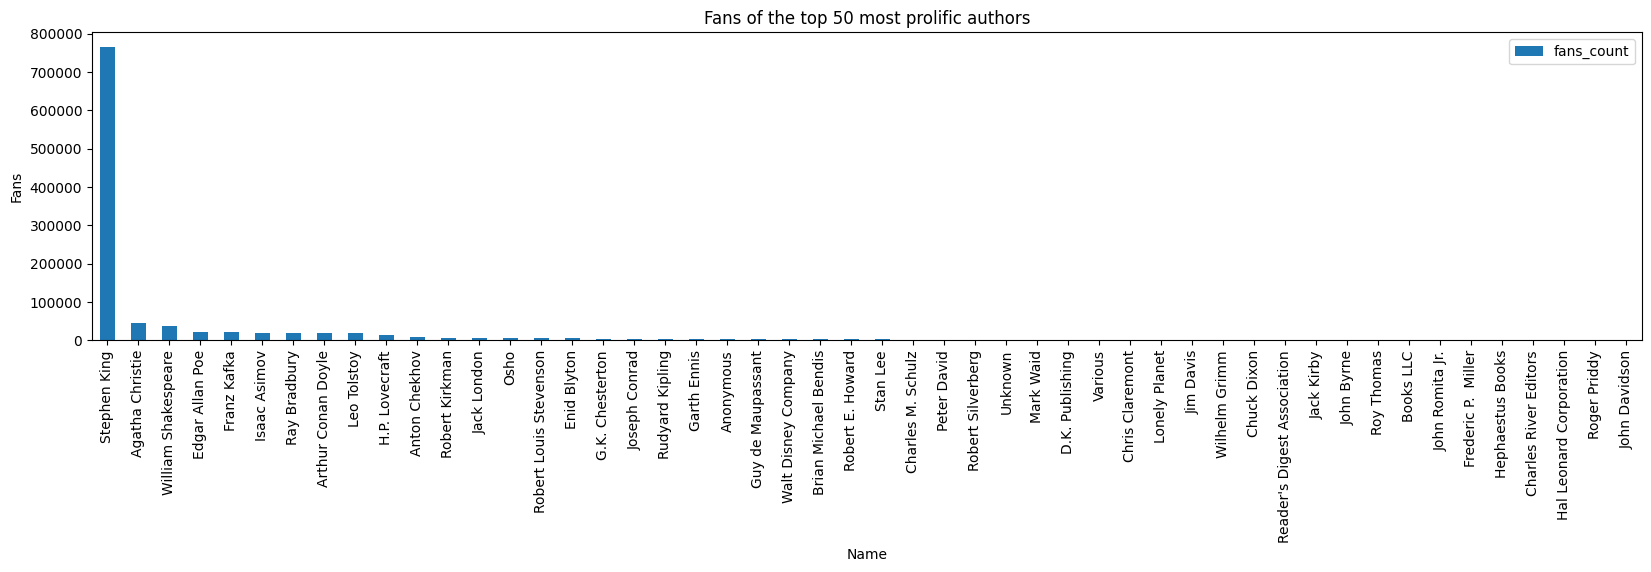

In [12]:
"""
    6. Plot the distribution of the fans count for the 50 most prolific authors (the ones who have written more books).
"""


# Get the first 50 most profilic authors 
prolific_authors = authors.sort_values(['book_ids'], key=lambda x: x.map(len), ascending=False).head(50)

# Sort the 50 most prolific authors by the number of fans
fans_dist = prolific_authors.sort_values(['fans_count'], ascending=False).plot(
    title="Fans of the top 50 most prolific authors", 
    kind='bar', 
    figsize=(20,4), 
    x='name', xlabel='Name',
    y='fans_count', ylabel='Fans',
)
plt.show()




<h3> Question 3 </h3>
<p>
Let’s have a historical look at the dataset! <br>

- Write a function that takes as input a year and returns as output the following information: <br>
    - The number of books published that year. <br>
    - The total number of pages written that year. <br>
    - The most prolific month of that year. <br>
    - The longest book written that year. <br>
- Use this function to build your data frame: the primary key will be a year, and the required information will be the attributes within the row. Finally, show the head and the tail of this new data frame considering the first ten years registered and the last ten years. <br>
- Ask **ChatGPT** or any other LLM chatbot tool to implement this function and compare your work with the one the bot gave you as an answer. Does the chatbot implementation work? Please test it out and verify the correctness of the implementation, explaining the process you followed to prove it.  <br>
</p>

In [13]:
"""
    1. Write a function that takes as input a year and returns as output the following information: 
            - The number of books published that year. 
            - The total number of pages written that year. 
            - The most prolific month of that year. 
            - The longest book written that year. 
"""

# Gets a date string  yyyy-mm-dd
# and parse the month. 
# If date is wrong or there is no month returns -1
def getMonth(date):
    d = date.split("-")
    if len(d) > 1 and d[1].isnumeric():
        return int(d[1])
    return -1


# Gets a date string  yyyy-mm-dd
# and parse the year. 
# If date is wrong returns -1
def getYear(date:str):
    if not date:
        return 0
    d = date.split("-")
    if d[0].isnumeric():
        return int(d[0])
    return -1


def historicInfo(books:pd.DataFrame, year:int):

    # Get the books of the year
    books_of_the_year = books.loc[books.original_publication_date.map(lambda x: getYear(x) == year)]

    # Get the number of pages for every book of the year, convert to int or set to 0
    books_of_the_year_pages = books_of_the_year.num_pages.map(lambda x: int(x) if x else 0)

    # Get the month for each book and count the occurence of every month
    months_book_count = books_of_the_year.original_publication_date.map(getMonth).value_counts()

    # The occurences of the invalid month does not count (except when then there are no valid months)
    months_book_count[-1] = 0

    # Get the book with the biggest num_pages value
    longest_book = books_of_the_year.loc[books_of_the_year_pages.idxmax()]

    # return the info as a dictionary
    return {
        "no_books":len(books_of_the_year), 
        "no_pages":books_of_the_year_pages.sum(), 
        "most_prolific_month":months_book_count.idxmax(), 
        "longest_book":longest_book.title, 
        "longest_book_id": longest_book.id
    }

In [14]:
"""
    2. Use this function to build your data frame: 
        The primary key will be a year, and the required information will be 
        the attributes within the row. Finally, show the head and the tail of 
        this new data frame considering the first ten years registered and the 
        last ten years.
"""


# Sort the unique registered years in the books dataset
years = sorted(books.original_publication_date.map(getYear).unique())

# remove unvalid years (found by getYear)
years.remove(-1) 

# Create a new dataframe with the historicalInfo for each year
# where index=year  and  value = historicInfo(year)
hist_info = pd.DataFrame([historicInfo(books, year) for year in years], index=years)


In [15]:
hist_info.head(10)

,no_books,no_pages,most_prolific_month,longest_book,longest_book_id
0,2656,440730,-1,Полное собрание сочинений в тридцати томах. В ...,98862
1,11,2501,1,College Algebra,61309
2,3,464,1,The Erotic Poems,1727
8,16,6985,1,Metamorphoses,1715
9,1,0,7,"Songs of Milkweed, a Gift from the Fields",69397
11,2,647,16,اسرارالتوحید فی مقامات شیخ ابوسعید ابی الخیر /...,162979
12,2,444,-1,Tristia,14163
13,2,1011,-1,Tristia. Ex Ponto,1732
16,1,165,-1,Ex Ponto Libri Quattuor,14160
49,1,106,-1,On the Shortness of Life,97412


In [16]:
hist_info.tail(10)

,no_books,no_pages,most_prolific_month,longest_book,longest_book_id
2012,69,26420,1,Collected Works of John Stuart Mill (8 Volumes),130282
2013,74,14289,9,Learning Python,80435
2014,56,13516,1,"Der nackte Gott (Armageddon-Zyklus, #6)",126421
2015,45,14042,10,Austen Boxed Set,91576
2016,5,983,5,Call of Cthulhu: Horror Roleplaying (Call of C...,33489
2017,5,336,8,Lord Vishnu's Love Handles: A Spy Novel (Sort Of),100499
2018,1,224,-1,Blue Beyond Blue: Extraordinary Tales for Ordi...,136644
2019,3,993,8,Cuentos completos,53400
2020,1,800,4,Set The Night On Fire: L.A. in the Sixties,7863
32767,1,0,1,いかに木を殺すか [Ikani ki o korosu ka],73762


In [ ]:
"""
    Ask **ChatGPT** or any other LLM chatbot tool to 
    implement this function and compare your work with 
    the one the bot gave you as an answer. 
    Does the chatbot implementation work? 
    Please test it out and verify the correctness 
    of the implementation, explaining the process you followed to prove it.
"""


# TO DO

<h3> Question 4 </h3>
<p>
Quirks questions about consistency. In most cases, we will not have a consistent dataset, and the one we are dealing with is no exception. So, let's enhance our analysis.<br>

- You should be sure there are no **eponymous** (different authors who have precisely the same name) in the author's dataset. Is it true?<br>
-  Write a function that, given a list of author_id, outputs a dictionary where each author_id is a key, and the related value is a list with the names of all the books the author has written.<br>
-  What is the **longest book title** among the books of the top 20 authors regarding their average rating? Is it the longest book title overall?<br>
-  What is the shortest overall book title in the dataset? If you find something strange, provide a comment on what happened and an alternative answer.<br>
</p>

In [18]:
"""
    1. You should be sure there are no **eponymous** (different authors who have precisely the same name) in the author's dataset. Is it true?
"""

# Count the occurences of the authors names
names = authors.name.value_counts()

# list all the authors that appear more than 2 times (yes the are lots of eponymous)
names[names > 1]


name
David Yates                     2
Boris Zakhoder                  2
Caroline Miller                 2
William Messner-Loebs           2
Peter  Marshall                 2
James Kent                      2
Jorge Molina                    2
Q. Hayashida                    2
Paul Graham                     2
小野不由美                           2
Peter Green                     2
Peter      Marshall             2
Dimitar Dimov                   2
James C.L. Carson               2
Mike   Lee                      2
Yordan Yovkov                   2
Cicerón                         2
Catherine   Jones               2
Peter  Davies                   2
Hildegard von Bingen            2
Robert W. Sullivan IV           2
John  Mole                      2
Jackson Butch Guice             2
Paul      Davies                2
محمد نجيب                       2
Joseph Fink                     2
Erin  Bedford                   2
Peter King                      2
George  Franklin                2
Julie  Ca

In [19]:
"""
    2. Write a function that, given a list of author_id, 
        outputs a dictionary where each author_id is a key, 
        and the related value is a list with the names of 
        all the books the author has written.
"""

# The function takes in input a list of book_ids and
# return a list of titles
def getBooksTitles(books, book_ids):
    return books.loc[books.id.isin(map(int, book_ids))].title


def getAuthorsBooks(authors:pd.DataFrame, books:pd.DataFrame, authors_ids:[int]):

    # Select authors with id in authors_ids
    selected_authors = authors.loc[authors.id.isin(authors_ids)]

    # Get the titles of the books for each author (map [book_ids] to [titles])
    auth_books = selected_authors.book_ids.map(lambda book_ids: getBooksTitles(books, book_ids))

    # Create a dictionary from the authors.id and the found books
    return {i:list(book) for i, book in zip(selected_authors.id, auth_books)}


# getAuthorsBooks(authors, books, range(0, 8))


In [20]:
"""
    3. What is the **longest book title** among the books of 
        the top 20 authors regarding their average rating? 
        Is it the longest book title overall?
"""

# Get the top 20 authors (by average rating) ids
auth_ids = authors.sort_values(['average_rating'], ascending=False).head(500).id

# Get the dictionary of books for the top 20 authors
books_dict = getAuthorsBooks(authors, books, auth_ids)

# Aggregate all the books of the top 20 authors in one single list
all_books = sum(list(books_dict.values()), [])

# Get the longest title of the top 20 authors
max(all_books, key=len)


'Historia de la Iglesia en España. 1. La Iglesia en la España romana y visigoda (siglos I-VIII)'

In [21]:
"""
    3b. Is it the longest book title overall?
"""

max(books.title, key=len)

'The New England Primer Issued Prior to 1830: A Bibliographical Checklist for the More Easy Attaining the True Knowledge of This Book, Embellished with a Hundred Cuts and Now Revised, Greatly Improved and Arranged in Two Alaphabets; With Preface, Introd...'

In [22]:
"""
    4. What is the shortest overall book title in the dataset? 
    If you find something strange, provide a comment on what 
    happened and an alternative answer.
"""

min(books.title, key=len)

'a'

In [23]:

"""
    BONUS) Let's see if there are other 1 letter books in the dataset
"""

books.loc[books.title.map(len) == 1, ['id', 'title', 'author_name']]


,id,title,author_name
30864,49595,a,Andy Warhol
32793,52945,G,John Berger
39948,65006,Q,Luther Blissett
39950,65008,Q,Luther Blissett
56483,94034,Q,Luther Blissett
66618,112833,b,NOT A BOOK


<h3> Question 5 </h3>
<p>
We can consider the authors with the most fans to be influential. Let’s have a deeper look.

- Plot the top 10 most influential authors regarding their fan count and number of books. Who is the most influential author?
- Have they published any series of books? If any, extract the longest series name among these authors.
- How many of these authors have been published in different formats? Provide a meaningful chart on the distribution of the formats and comment on it. 
- Provide information about the general response from readers (number of fans, average rating, number of reviews, etc.), divide the authors by gender, and comment about anything eventually related to “structural bias.” You may want to have a look at the following recommended readings:
  
    - https://bhm.scholasticahq.com/article/38021
    - https://priyanka-ddit.medium.com/how-to-deal-with-imbalanced-dataset-86de86c49
    - https://compass.onlinelibrary.wiley.com/doi/10.1111/soc4.12962

    You can even ask ChatGPT or any other LLM chatbot tool: try to formulate a prompt that provides helpful information about it. Put that information in your notebook and provide comments on what you found.
</p>

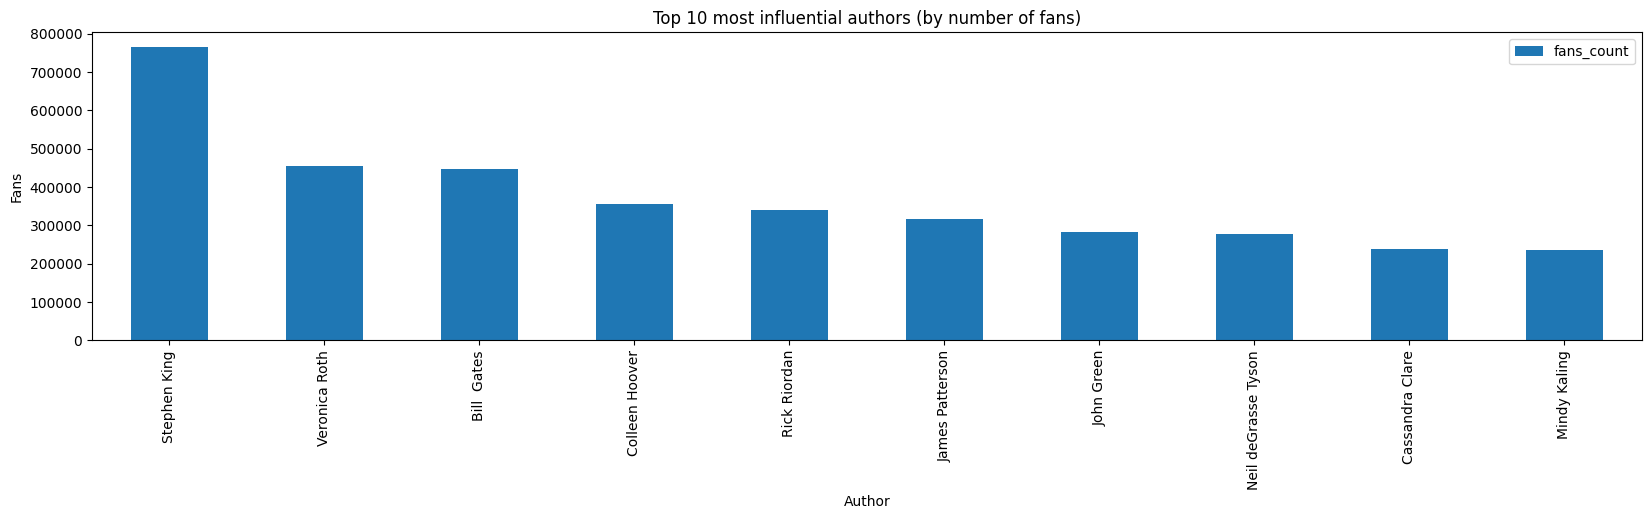

In [24]:
"""
    1. Plot the top 10 most influential authors 
        regarding their fan count and number of books.
        Who is the most influential author?
        (fan_count)
"""

authors.sort_values(['fans_count'], ascending=False).head(10).plot(
    title='Top 10 most influential authors (by number of fans)',
    kind='bar', 
    x='name', xlabel='Author',
    y='fans_count', ylabel='Fans',
    figsize=(20, 4)
)

plt.show()


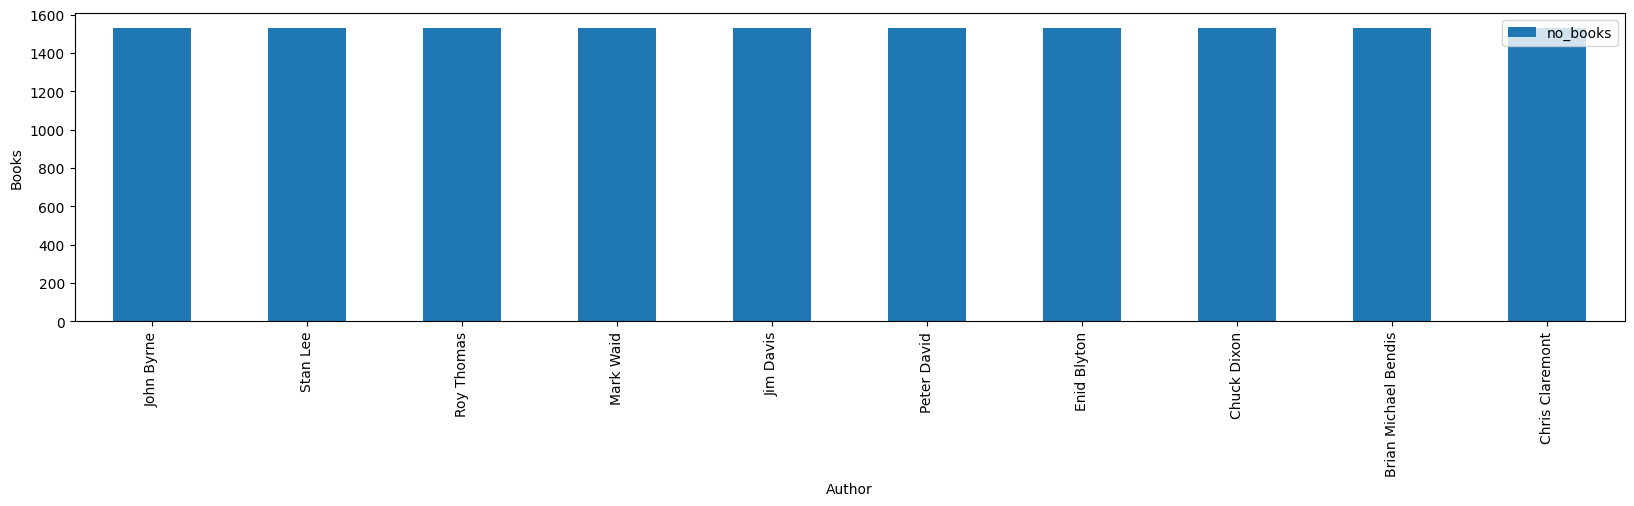

In [25]:
"""
    1. Plot the top 10 most influential authors 
        regarding their fan count and number of books.
        Who is the most influential author?
        (no_books)
"""

authors.loc[:, 'no_books'] = authors.book_ids.map(len)

authors.sort_values(['no_books'], ascending=False).head(10).plot(
    kind='bar', 
    x='name', xlabel='Author',
    y='no_books', ylabel='Books',
    figsize=(20, 4)
)

plt.show()


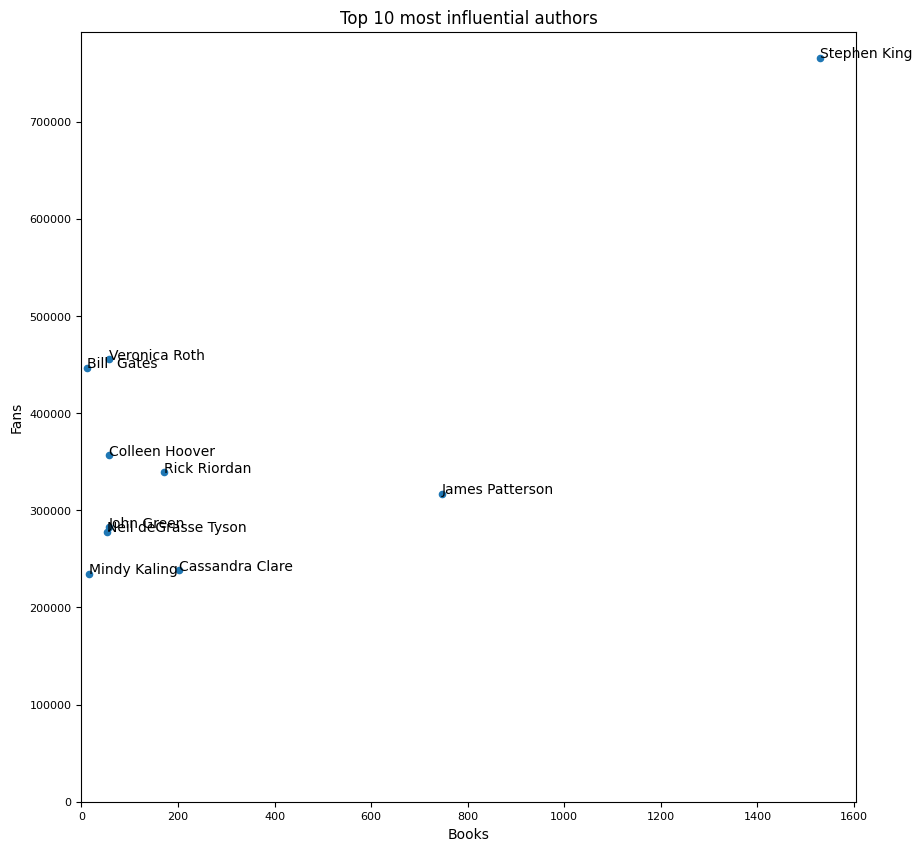

In [26]:

"""
    1 BONUS. Plot the top 10 most influential authors 
        regarding their fan count and number of books.
        Who is the most influential author?
"""

# Another way to visualize how influential is an author is to plot each author on a x = no_books  y = no_fans

# Consider the inf_score as the distance from the center of the [no_books, inf_score] vectorial space
authors.loc[:, 'inf_score'] = (authors.no_books**2 + authors.fans_count**2)**0.5

# The top 10 authors are the 10 that are the farthest from the center of the [no_books, inf_score] vectorial space
top_auth = authors.sort_values(['inf_score'], ascending=False).head(10)

ax = top_auth.plot(
    title='Top 10 most influential authors',
    kind='scatter', 
    x='no_books', xlabel='Books', 
    y='fans_count', ylabel='Fans', 
    figsize=(10, 10), 
    fontsize=8,
    xlim=(0),
    ylim=(0)
)

for idx, row in top_auth.iterrows():
    ax.annotate(row['name'], (row['no_books'], row['fans_count']))

plt.show()


In [27]:
"""
    2. Have they published any series of books? 
        If any, extract the longest series name among these authors.
"""

# Function takes in input book_ids and returns the relative series
# If a book is not part of a series the value in series is nan
def fromBookIdsToSeriesNames(books, book_ids):
    return books.loc[books.id.isin(map(int, book_ids))].series_name

# Get the top 10 most influentials authors (regarding fans count)
top_auth = authors.sort_values(['fans_count'], ascending=False).head(10)

# List all series of the books of the top 10 authors
auth_series = (top_auth.book_ids.map(lambda book_ids: fromBookIdsToSeriesNames(books, book_ids))).explode().dropna()

# get the max len series name
max(auth_series, key=len)




"The Year's Best Fantasy and Horror"

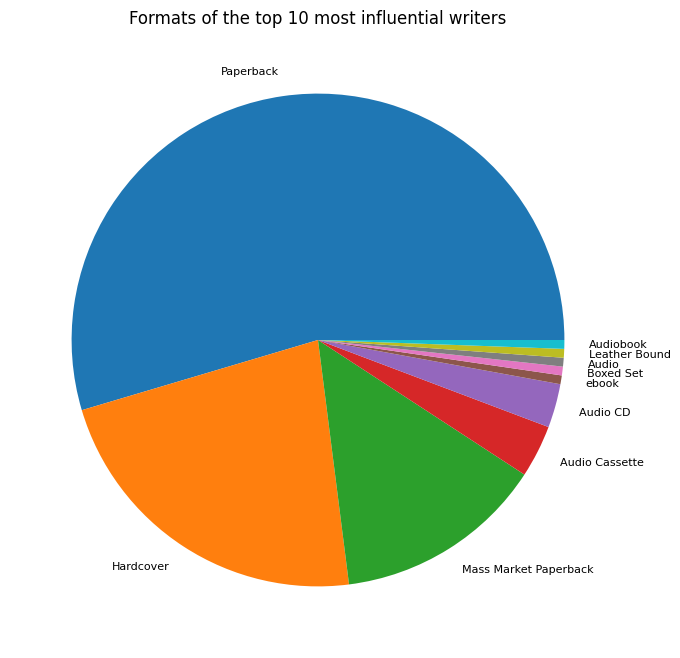

In [28]:
"""
    3. How many of these authors have been published in different formats? 
        Provide a meaningful chart on the distribution of the formats and comment on it. 
"""

# function takes in input a list of book_ids
# and return a list of the formats of that books 
def fromBookIdsToFormats(books, book_ids):
    return books.loc[books.id.isin(map(int, book_ids))].format

# Get the top 10 most influentials authors (regarding fans count)
top_auth = authors.sort_values(['fans_count'], ascending=False).head(10)

# Return the list of all formats of the books of the top 10 autors
auth_formats = top_auth.book_ids.map(lambda book_ids: fromBookIdsToFormats(books, book_ids)).explode()

# Plot the format distribution dataframe (ignoring the non specified formats)
auth_formats[auth_formats != ""].value_counts().plot(
    title='Formats of the top 10 most influential writers',
    kind='pie', 
    y = 'format', ylabel="",
    fontsize=8, 
    figsize=(8,8)
)
plt.show()

In [29]:
"""
    4. Provide information about the general response from readers (number of fans, average rating, number of reviews, etc.), 
        divide the authors by gender, and comment about anything eventually related to “structural bias.” 
        You may want to have a look at the following recommended readings:
  
            - https://bhm.scholasticahq.com/article/38021
            - https://priyanka-ddit.medium.com/how-to-deal-with-imbalanced-dataset-86de86c49
            - https://compass.onlinelibrary.wiley.com/doi/10.1111/soc4.12962

"""

# find gender groups 

print(list(authors.groupby('gender').size().keys()))


['', '(He/Him)', '-', 'AMAB', 'Adrogynous', 'Agender', 'Agenderflux', 'Androgynous', 'Author', 'Avocado/She', 'Bigender', 'Bot', 'Couple (man and woman)', 'Donkey Kong', 'Effete', 'Enby', 'Femme', 'Femme lesbian', 'Fiction', 'Fifth Gender', 'Fluid', 'Gender Apathetic', 'Gender Neutral', 'Gender is Moot', 'Genderfluid', 'Genderless', 'Genderq', 'Genderqueen', 'Genderqueer', 'Genderqueer Femme', 'Genderqueer transfemme', 'Greygender, genderfluid', 'Human', 'Husband and Wife', 'I exist', 'I have no idea', 'Irrelevant', 'Learned', "Let's just go with the flow", 'Male', 'Male (FtM)', 'Master', 'Maverique', 'Muppet', 'NB', 'NB femme', 'Neutral', 'Neutrois', 'Non Binary', 'Non binary', 'Non-Binary', 'Non-Binary Transgender', 'Non-binary', 'Non-binary Woman', 'Non-binary genderfluid', 'Nonbinary', 'Nonbinary Woman', 'Nonbinary, genderfluid, genderqueer', 'None', 'Not specified', 'Partnership (Both)', 'Pizza and Pretzels', 'Platypus', "Probably not relevant: if you think it is, provide your rea

In [30]:
# For the sake of the analisys the genders will be divided in 3 major gender groups
# 1. male   ('(He/Him)', 'Male', 'Male (FtM)', 'male')
# 2. female ('She/Her/Hers', 'Woman', 'female',)
# 3. other

male = ["'(He/Him)'", "Male", "Male (FtM)", "male"]
female = ["She/Her/Hers", "Woman", "female"]

gen_auths = authors[authors.gender.map(lambda x: len(x) > 0)]

gen_auths.loc[authors.gender.isin(male), 'gender'] = "male"
gen_auths.loc[authors.gender.isin(female), 'gender'] = "female"
gen_auths.loc[authors.gender.isin(['male', 'female']).map(lambda x: not x), 'gender'] = "oth"


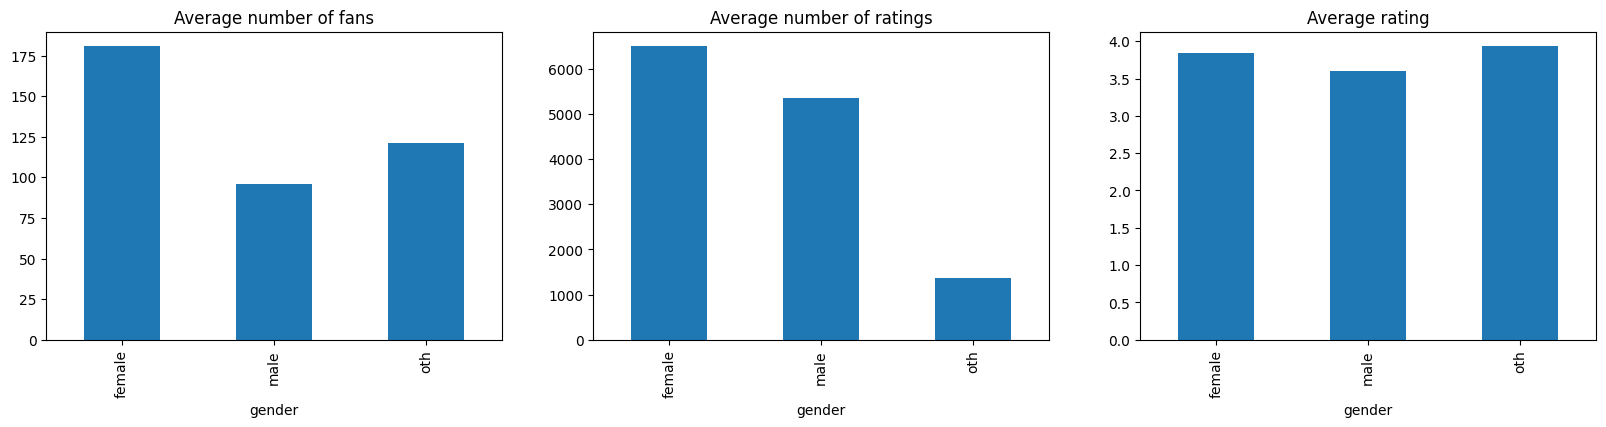

In [31]:
# Lets check the avg number of fans, ratings and rating score, for each gender

gen_stats = gen_auths.loc[:, ['gender', 'fans_count', 'ratings_count', 'average_rating']].groupby(['gender']).mean()

fig, axes = plt.subplots(nrows=1, ncols=3)

gen_stats.plot(
    title='Average number of fans',
    kind='bar', 
    y='fans_count', 
    legend=False, 
    ylabel="",
    ax=axes[0],
    figsize=(20, 4)
)

gen_stats.plot(
    title='Average number of ratings',
    kind='bar', 
    y='ratings_count', 
    legend=False, 
    ylabel="",
    ax=axes[1],
    figsize=(20, 4),
)

gen_stats.plot(
    title='Average rating',
    kind='bar', 
    y='average_rating', 
    legend=False, 
    ylabel="",
    ax=axes[2],
    figsize=(20, 4),
)

plt.show()



<h3> Question 6 </h3>
<p>
For this question, consider the top 10 authors concerning the number of fans again.

- Provide the average time gap between two subsequent publications for a series of books and those not belonging to a series. What do you expect to see, and what is the actual answer to this question?
- For each of the authors, give a convenient plot showing how many books has the given author published **UP TO** a given year. Are these authors contemporary with each other? Can you notice a range of years where their production rate was higher?
</p>

In [ ]:
"""
    1. Provide the average time gap between two subsequent publications 
        for a series of books and those not belonging to a series. 
        What do you expect to see, and what is the actual answer to this question?
"""

# TODO


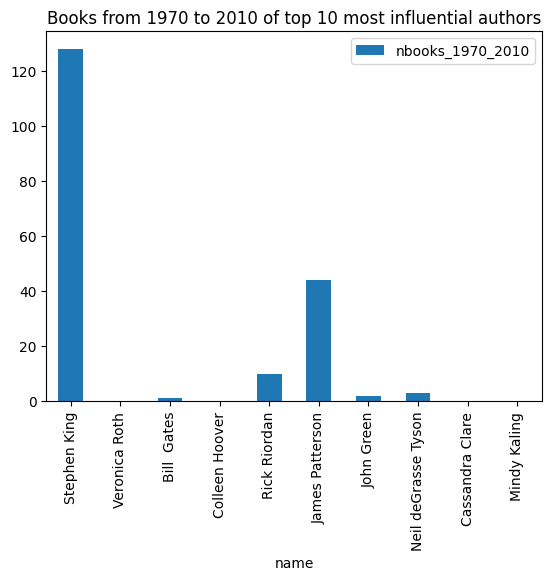

In [32]:

"""
    2. For each of the authors, give a convenient plot showing 
        how many books has the given author published **UP TO** a given year. 
        Are these authors contemporary with each other? 
        Can you notice a range of years where their production rate was higher?
"""

# For every author return the number of books UP to a given year

# For each author map book_ids to original_pubblication_dates that are less than year

# For each author calc the len of the original_pubblication_dates

def getYear(date:str):
    if not date:
        return 0
    d = date.split("-")
    if d[0].isnumeric():
        return int(d[0])
    return 0

# returns the number of books among_book_ids that have original_publication_date < year
def getNoBooksInRange(books, book_ids, start_year, end_year):
    publication_years = books.loc[books.id.isin(map(int, book_ids))].original_publication_date.map(getYear)
    return len(publication_years[(start_year < publication_years) & (publication_years < end_year)])



top_fans_auth = authors.sort_values(['fans_count'], ascending=False).head(10)

start_year = 1970
end_year = 2010

top_fans_auth.loc[:, f'nbooks_{start_year}_{end_year}'] = top_fans_auth.book_ids.map(lambda book_ids: getNoBooksInRange(books, book_ids, start_year, end_year))

top_fans_auth.plot(kind='bar', title=f'Books from {start_year} to {end_year} of top 10 most influential authors', x='name', y=f'nbooks_{start_year}_{end_year}')

plt.show()



<h3> Question 7 </h3>

<p>
Estimating probabilities is a core skill for a data scientist: show us your best!

- Estimate the probability that a book has over 30% of the ratings above 4.
- Estimate the probability that an author publishes a new book within two years from its last work.
- In the file [*list.json*](https://www.kaggle.com/datasets/opalskies/large-books-metadata-dataset-50-mill-entries?select=list.json), you will find a peculiar list named **"The Worst Books of All Time."** Estimate the probability of a book being included in this list, knowing it has more than 700 pages.
- Are the events *X=’Being Included in The Worst Books of All Time list’* and *Y=’Having more than 700 pages’* independent? Explain how you have obtained your answer.
</p>


In [33]:

"""
    1. Estimate the probability that a book has over 30% of the ratings above 4
"""

# Get the number of books with more then 30% ratings above 4

# Get in input a rating dist like
# 5:10|4:70|3:15|2:5|1:0  -> {5:0.1, 4:0.7, 3:0.15, 2:0.05, 1:0}
# and returns a dictionary with
# the percentual distribution
def ratingsToPercent(ratings):
    rat = {l[0]:int(l[1]) for l in [x.split(':') for x in ratings.split('|')]}
    return {k:rat[k]/rat['total'] if rat['total'] else 1 for k in ['1','2','3','4','5']} 

# print(ratingsToPercent("5:30|4:40|3:20|2:10|1:0|total:100"))

good_books = books.loc[books.rating_dist.map(ratingsToPercent).map(lambda dist: dist['5'] > 0.3)]

probability = len(good_books)/len(books)

probability



0.5942950872139542

In [ ]:
# For each author get the date of the last work (last_work_date)

# For each author get sorted pubblication dates of all the books (books_dates)

# Get the authors where there is at leas one book_date such that  last_work_date < book_date  and book_date < last_work_date + 2 years


In [37]:
"""
    3. In the file [*list.json*](https://www.kaggle.com/datasets/opalskies/large-books-metadata-dataset-50-mill-entries?select=list.json), 
    you will find a peculiar list named **"The Worst Books of All Time."
    ** Estimate the probability of a book being included in this list, knowing it has more than 700 pages.

"""

# load the worst books of all time
with open('data/list.json') as worst:
    doc = json.loads(worst.readline())

wb = pd.DataFrame(doc['books'])

# filter out the worst_books that are not in the books dataframe
worst_books = wb.loc[wb.book_id.map(int).isin(books.id)]

worst_books







,book_id,title,author_id,author,position
0,41865,Twilight,941441,Stephenie Meyer,"{'ranking': 1, 'score': 527144, 'votes': 5303}"
2,49041,New Moon,941441,Stephenie Meyer,"{'ranking': 3, 'score': 356742, 'votes': 3648}"
9,968,The Da Vinci Code,630,Dan Brown,"{'ranking': 10, 'score': 85252, 'votes': 875}"
14,48625,The No Spin Zone: Confrontations with the Powe...,27281,Bill O'Reilly,"{'ranking': 15, 'score': 57981, 'votes': 615}"
18,19501,"Eat, Pray, Love",11679,Elizabeth Gilbert,"{'ranking': 19, 'score': 52598, 'votes': 549}"
...,...,...,...,...,...
7364,21436,Cat and Mouse,3780,James Patterson,"{'ranking': 7365, 'score': 7, 'votes': 1}"
7369,6588,The Big Bad Wolf,3780,James Patterson,"{'ranking': 7370, 'score': 6, 'votes': 1}"
7372,17303,Piercing the Darkness,5544,Frank E. Peretti,"{'ranking': 7373, 'score': 6, 'votes': 1}"
7386,21717,Triptych,12504,Karin Slaughter,"{'ranking': 7387, 'score': 3, 'votes': 1}"


In [38]:
# Probability of choosing a "worst book"

# Get the number of worst books
worst_books_count = len(worst_books)

# Get the number of total books
books_count = len(books) 

# Print the ratio (probability of getting a 'worst' book)
print(worst_books_count/books_count)


# The probability of choosing a worst book is 0.02089

0.02089334293486958


In [39]:
# Probability of choosing a "worst books" amongst long books (more then 700 pages)

# Get the books with more than 700 pages    M
long_books = books.loc[books.num_pages.map(lambda x: int(x) > 700 if x else False)]
long_books_count = len(long_books)

# Get the worst books with more than 700 pages  W ∩ M
worst_long_books = worst_books.loc[worst_books.book_id.map(int).isin(long_books.id)] 
worst_long_books_count = len(worst_long_books)

# Get the probability of getting a worst book inside the "more than 700 pages" set  P(W|M) = #M/#TOT  / #(W ∩ M)/#TOT = #M/#(W ∩ M)
print(worst_long_books_count/long_books_count)


# The probability of choosing a worst books if you choose a long book (more than 700 pages) is 0.0375
# highter then the probability of choosing a worst book in general that is 0.0209

# The "having more then 700 pages" and "being a worst book" are dependent events.




0.03758020164986251


<h3> Question 8 </h3>
<p>
Charts, statistical tests, and analysis methods are splendid tools to illustrate your data-driven decisions to check whether a hypothesis is correct.

- Can you demonstrate that readers usually rate the longest books as the worst?
- Compare the average rate distribution for English and non-English books with a proper statistical procedure. What can you conclude about those two groups?
- About the two groups in the previous question, extract helpful statistics like mode, mean, median, and quartiles, explaining their role in a box plot.
- It seems reasonable to assume that authors with more fans should have more reviews, but maybe their fans are a bit *lazy*. Confirm or reject this with a convenient statistical test or a predictive model.
- Provide a short survey about helpful statistical tests in data analysis and mining: focus on hypothesis design and the difference between parametric and nonparametric tests, explaining the reasons behind the choice of one of these two tests.

</p>

/tmp/ipykernel_5955/20547221.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_with_pages.loc[:, 'group'] = books_with_pages.num_pages.map(toGroup)


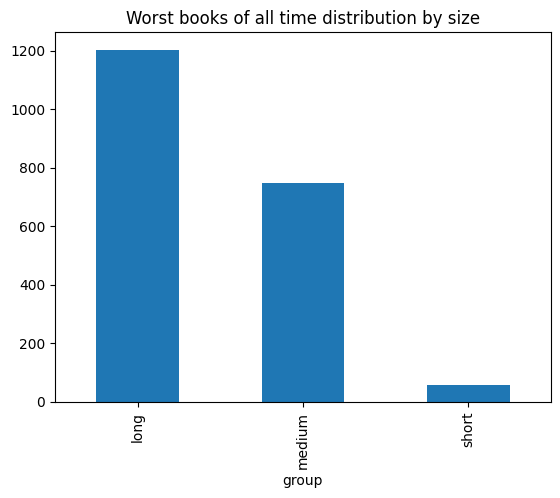

In [40]:
"""
    1. Can you demonstrate that readers usually rate the longest books as the worst?
"""


books_with_pages = books.loc[(books.num_pages != "") & books.id.isin(worst_books.book_id.map(int))]

# Lets consider 3 groups of books 
# short books  num_pages < 200
# medium books [200, 300]
# long books [300, 500]
# very long books > 500

# We will plot the average score for each of the groups

def toGroup(num_pages):
    n = int(num_pages)
    if n < 100:
        return 'short'
    if n < 300:
        return 'medium'
    
    return 'long'


books_with_pages.loc[:, 'group'] = books_with_pages.num_pages.map(toGroup)

books_with_pages.loc[:, ['group', 'average_rating']].groupby('group').size().plot(
    title='Worst books of all time distribution by size',
    kind='bar',
    x='group',
    y='average_rating'
)

plt.show()




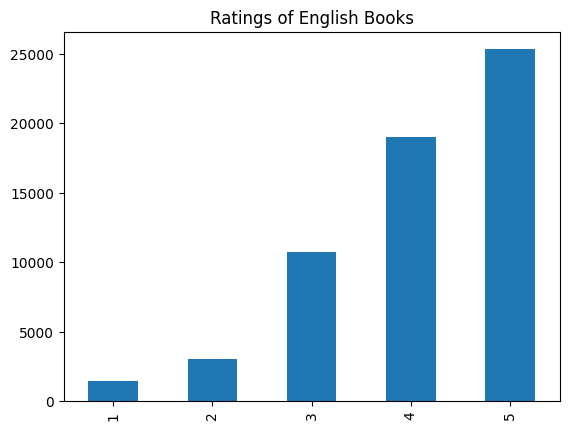

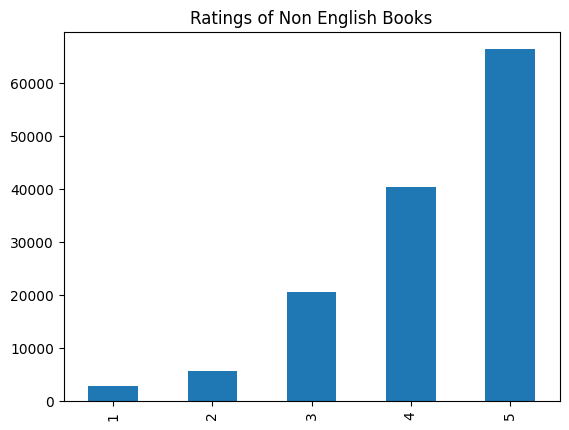

In [41]:
"""
    2. Compare the average rate distribution for English and non-English books with a proper statistical procedure. 
    What can you conclude about those two groups?
"""

def ratingsToValues(ratings):
    rat = {l[0]:int(l[1]) for l in [x.split(':') for x in ratings.split('|')]}
    return {k:rat[k] for k in ['1','2','3','4','5']} 



# Get the ratings distributions for english books (rates distribution for every book) 
english_books = books.loc[books.language.isin(['eng', 'en-US', 'en-GB'])]
eng_ratings = pd.DataFrame(list(english_books.rating_dist.map(ratingsToValues)))
eng_ratings.mean().plot(kind='bar', title='Ratings of English Books')
plt.show()


# Get the ratings distributions for non-english books (rates distribution for every book) 
non_english_books = books.loc[books.language.isin(['eng', 'en-US', 'en-GB', '']).map(lambda x: not x)]
neng_ratings = pd.DataFrame(list(non_english_books.rating_dist.map(ratingsToValues)))
neng_ratings.mean().plot(kind='bar', title='Ratings of Non English Books')
plt.show()


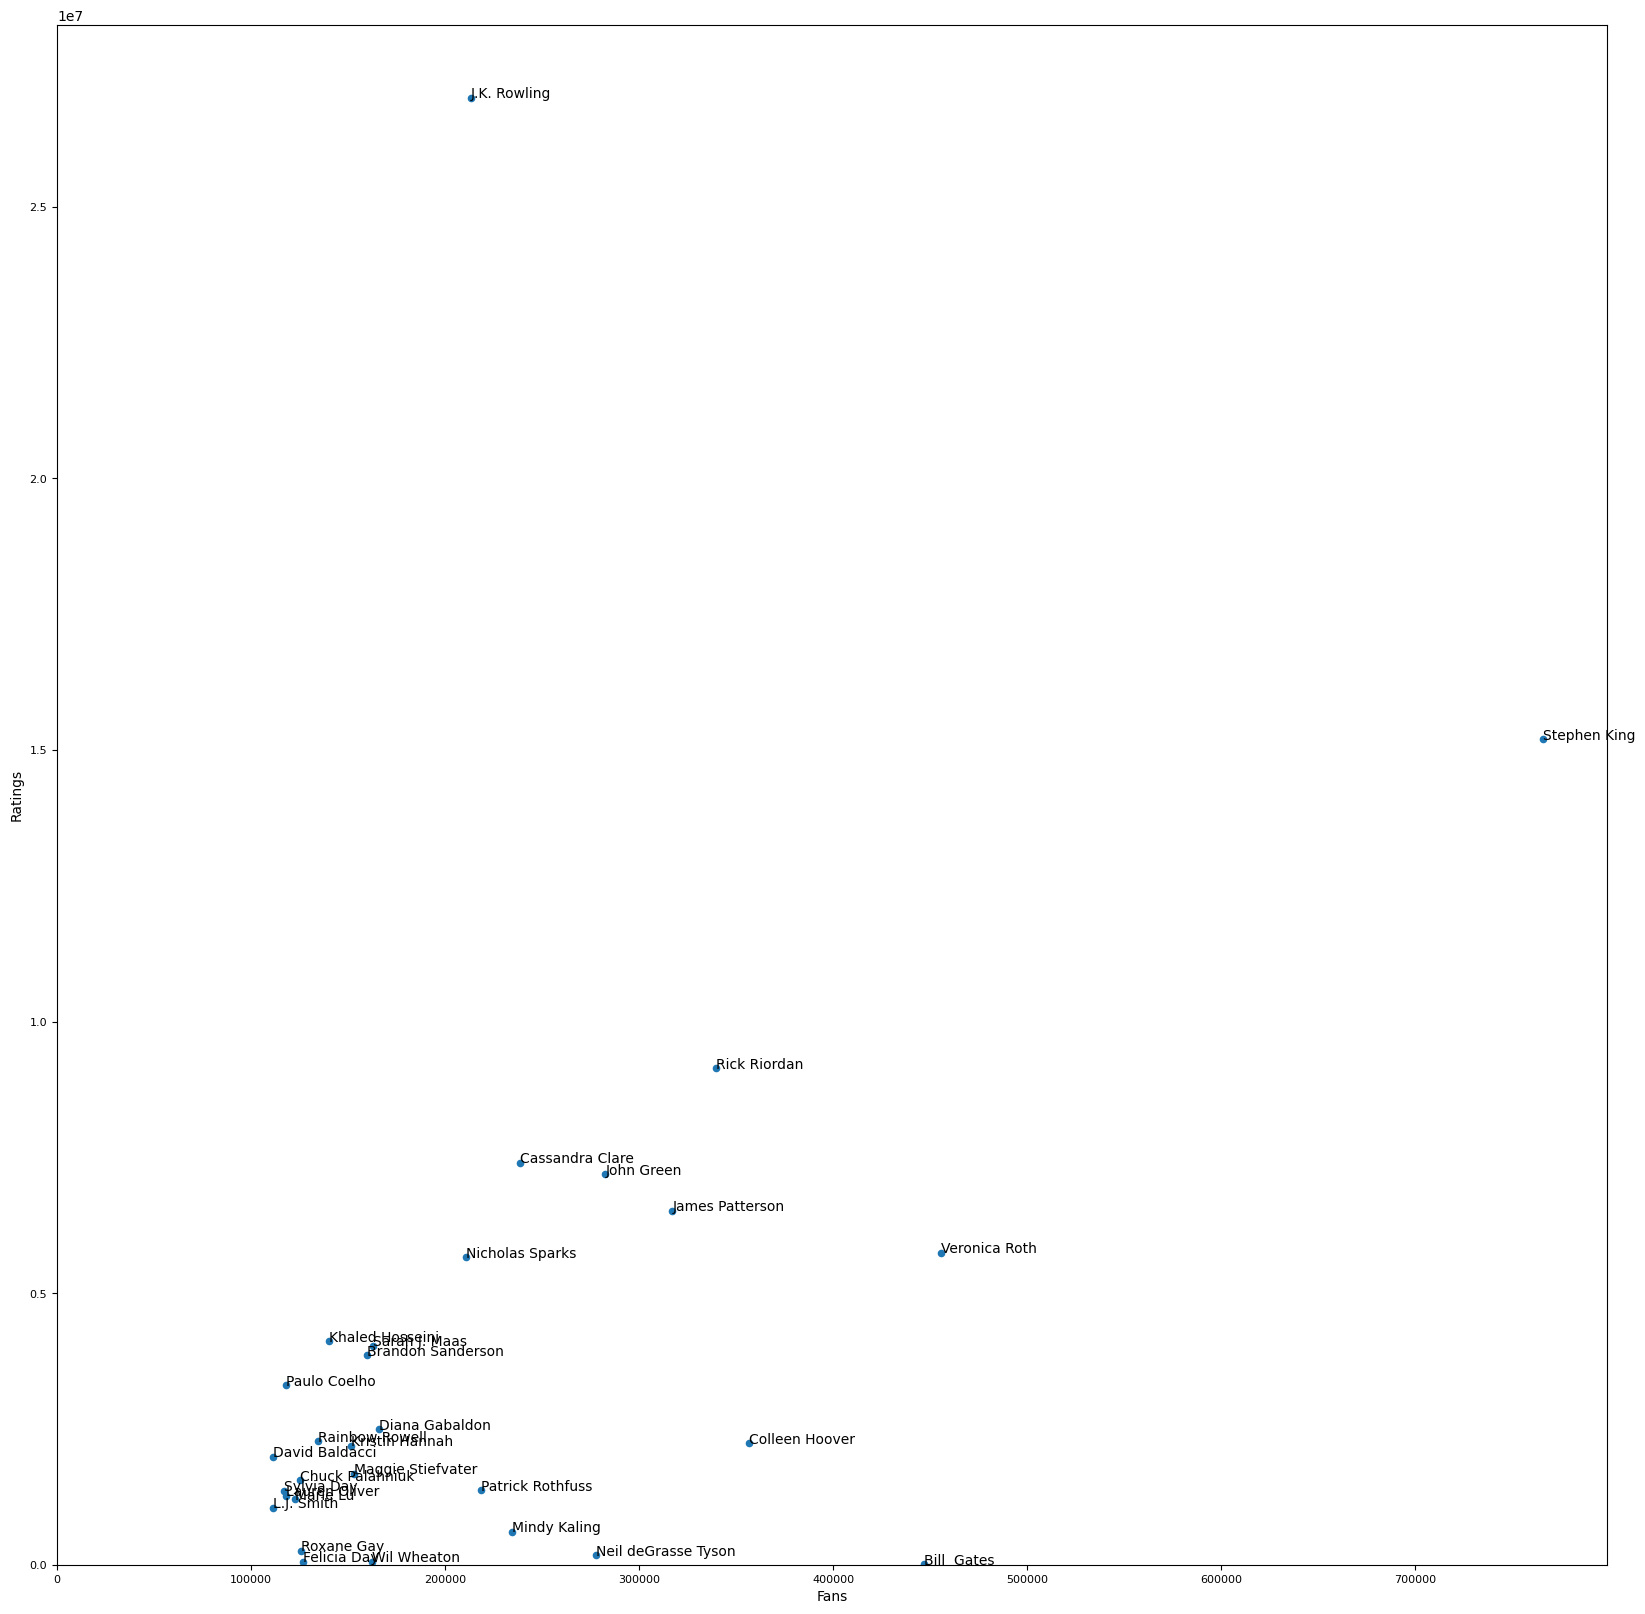

In [42]:
"""
    4. It seems reasonable to assume that authors with more fans should have more reviews, 
        but maybe their fans are a bit *lazy*. 
        Confirm or reject this with a convenient statistical test or a predictive model.
"""

top_fans_auth = authors.sort_values(['fans_count'], ascending=False).head(30)

ax = top_fans_auth.plot(
    kind='scatter', 
    x='fans_count', xlabel='Fans', 
    y='ratings_count', ylabel='Ratings', 
    figsize=(20, 20), 
    fontsize=8,
    xlim=(0),
    ylim=(0)
)

for idx, row in top_fans_auth.iterrows():
    ax.annotate(row['name'], (row['fans_count'], row['ratings_count']))

plt.show()

# Conclusion: 
# There are authors that have lots of fans but very little ratings, there are usually
# non-writers famous people
# For the writters the pattern seems true (number of reviews is proportional to the
# number of fans)



<h2> Command Line Questions </h3>
<p>
Using the command line is a feature that Data Scientists must master. It is relevant since the operations there require less memory to use in comparison to other interfaces. It also uses less CPU processing time than other interfaces. In addition, it can be faster and more efficient and handle repetitive tasks quickly.

__Note:__ To answer the question in this section, you must strictly use command line tools. We will reject any other method of response. 

Looking through the files, you can find [series.json](https://www.kaggle.com/datasets/opalskies/large-books-metadata-dataset-50-mill-entries), which contains a list of book series. In each series's <ins>'works'</ins> field, you'll find a list of books that are part of that series. Report the title of the __top 5__ series with the <ins>highest total 'books_count'</ins> among all of their associated books using command line tools. 
</p>

<h3> CL 1 </h3>
<p>
Write a script to provide this report. Put your script in a shell script file with the appropriate extension, then run it from the command line. The file should be called commandline_original.[put_the_proper extension]
</p>

<h3> CL2 </h3>
<p>
Try interacting with ChatGPT or any other LLM chatbot tool to implement a <ins>more robust</ins> script implementation. Your final script should be __at most three lines__. Put your script in a shell script file with the appropriate extension, then run it from the command line. The file should be called commandline_LLM.[put_the_proper_ extension]. Add in your homework how you employed the LLM chatbot tools, validate if it is correct, and explain how you check its correctness.
   
The expected result is as follows: 

|id|title|total_books_count|
|---|---|---|
|302380|Extraordinary Voyages|20138|
|94209|Alice's Adventures in Wonderland|14280|
|311348|Kolekcja Arcydzieł Literatury Światowe|13774|
|41459|Oz|11519|
|51138|Hercule Poirot|11305|

</p>

<h2> AWS Questions </h2>
<p>
AWS offers access to many cloud-based tools and services that simplify data processing, storage, and analysis. Thanks to AWS's scalable and affordable solutions, data scientists can work effectively with large datasets and carry out advanced analytics. A data scientist must, therefore, perform the essential task of learning how to use AWS. To complete a straightforward data analysis task in this question, you must set up an environment on Amazon Web Services. 

In this question, you are asked to provide the most commonly used tags for book lists. Going through the [__list.json__](https://www.kaggle.com/datasets/opalskies/large-books-metadata-dataset-50-mill-entries) file, you'll notice that each list has a list of tags attached, and we want to see what are the <ins>most popular tags</ins> across all of the lists. Please report the __top 5__ most frequently used tags and the number of times they appear in the lists.

You have to follow the following (recommended) steps:  
- Download the *list.json* file to your local system. 
- Write a Python script that generates the report and the system's time to generate it.
- Set up an EC2 instance on your AWS account and upload the list.json file together with your script to the instance
- Compare the running times of your script on your local system and the EC2 instances.

__Important note__: Please run the __same script__ on both your local system and your EC2 instance to compare the results. e.g., keep the parameters the same if you are processing the data by loading it partially and aggregating the results. Comment about the differences you find.

Please provide a report as follows: 
- The information about the config of the EC2 instance 
- The command used to connect to the EC2 
- The commands used to upload the files and run the script on the EC2 instance through your local system 
- A table containing the most popular tags and their number of usage
- A table containing the running time of the script on your local system and EC2 instance
  
The following is the expected outcome for the most popular tags:
|tag|#usage|
|---|---|
|romance|6001|
|fiction|5291|
|young-adult|5016|
|fantasy|3666|
|science-fiction|2779|
</p>


<h2> Algorithmic Question (AQ) </h2>
Assume you are working as a librarian at a public library in Rome. Some new books have arrived, and you are in charge of putting them on a shelf. Your supervisor will give you some instructions, and you will follow his. Each book has a unique ID, and your boss's instructions can be of the following types: 

- **L N** - place the book with ID = N on the shelf to the left of the leftmost existing book
- **R N** - place the book with ID = N on the shelf to the right of the rightmost existing book
- **? N** - Calculate the minimum number of books you must pop from the left or right to have the book with ID = N as the leftmost or rightmost book on the shelf.
  
You must follow your boss's instructions and report the answers to type 3 instructions to him. He guarantees that if he has a type 3 instruction for a book with a specific ID, the book has already been placed on the shelf. 

Remember that once you've answered a type 3 instruction, the order of the books <ins>does not change</ins>. 

**Input:**

The first line contains a single number, n, representing the number of your boss's instructions. The ith instruction the boss gives can be found at each of the following n lines. 

**Output:**

Print your boss's type 3 instructions in the order they appear in the input. 

**Examples:**

__Input 1__
```
L 75  R 20  R 30  L 11  ? 75  L 12  L 15  ? 20
```
__Output 1__
```
1  1
```
---
__Input 2__
```
R 1  L 2  L 3  L 4  ? 3  R 5  R 6  L 7  L 8  ? 4  L 9  R 10  R 11  L 12  L 13  ? 11  ? 3
```
__Output 2:__
```
1  2  0  6
```

1. Implement a code to answer the problem above. 

2. Ask ChatGPT or any other LLM chatbot tool to check your code's time complexity (the Big O notation). Do you believe this is correct? How can you double-check it? Elaborate about your answer.

3. Is the algorithm proposed in (1.) the __optimal__ one to produce the required output? If not, can you suggest a <ins>better algorithm</ins> to perform the same task?

In [43]:

from collections import deque

def getPoppedBooks(instructions):

    queue = deque()                                 # create a deque object
    popped = []                                     # create an empty list of popped books numbers

    for instruction in instructions:                # iterate on each istruction
        operation = instruction[0]                  # get the op part of the instruction
        bookID = instruction[1]                     # get the value part of the instruction 
        if operation == 'R':                        # if the op is R then append the new book on the right
            queue.append(bookID)
        elif operation == 'L':                      # if the op is L then append the new book on the left
            queue.appendleft(bookID)
        elif operation == '?':                      # if the op is ?
            for i in range(len(queue)//2 + 1):      # search the deque from right and left at the same time (towards the center).
                if (queue[i] == bookID or           # check if either the left index or the right index found the value 
                    queue[-i-1] == bookID):         
                    popped.append(i)                # save the first index that finds the value in the deque 
                    break                           # exit the search
    return popped




inst1 = "L 75  R 20  R 30  L 11  ? 75  L 12  L 15  ? 20"
inst2 = "R 1  L 2  L 3  L 4  ? 3  R 5  R 6  L 7  L 8  ? 4  L 9  R 10  R 11  L 12  L 13  ? 11  ? 3"


# parse the instruction string into a list of instructions
# "L 75  R 20  R 30"  ->  [["L", "75"], ["R", "20"], ["R", "30"]]
# and pass the list of instructions to the function
print(getPoppedBooks([inst.split(" ") for inst in inst2.split("  ")]))


# Let's put n = number of instructions
# The function iterates over each instruction and 
# In case of  op="L" or op="R"  the cost of append is constant
# In case of op="?" the cost is proportional to n/2 in the worst case (value in the center of deque)

# asuming that the number of ? instructions is proportional to n. The complexity of the
# algorithm is O(n^2)


[1, 2, 0, 6]
